In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer=load_breast_cancer()

In [3]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

In [4]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


* Using MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler()

* We fit the scaler using the **fit** method, applied to the training data
* For MinMaxScaler, the **fit** method computes the minimum and maximum value of each feature on the training set.
* In contrast to the classifiers and regressors, the scaler is only provided with the data(X_train) when **fit** is called, and y_train is not used

* To actually *scale* the training data-we use the **transform** methods of scaler

In [7]:
# transform data
# axis=0: index axis=1: columns
X_train_scaled=scaler.transform(X_train)
print('transformed shape:{}'.format(X_train_scaled.shape))
print('')
print('per-feature minimum before scaling:\n{}'.format(X_train.min(axis=0)))
print('')
print('per-feature minimum after scaling:\n{}'.format(X_train_scaled.min(axis=0)))

transformed shape:(426, 30)

per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]

per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [8]:
print('transformed shape:{}'.format(X_train_scaled.shape))
print('')
print('per-feature maxiimum before scaling:\n{}'.format(X_train.max(axis=0)))
print('')
print('per-feature maximum after scaling:\n{}'.format(X_train_scaled.max(axis=0)))

transformed shape:(426, 30)

per-feature maxiimum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]

per-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


* The transformed data has the same shape as the orginal data     
* The features are simply shifted and scaled
* All of the features are now between 0 and 1    

* To apply the SVM to the scaled data, we also need to transform the test set.

In [9]:
# transform test data
X_test_scaled=scaler.transform(X_test)
print('per-feature minimum after scaling:\n{}'.format(X_test_scaled.min(axis=0)))
print('per-feature maximum after scaling:\n{}'.format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


After scaling, the minimum and maximum are not 0 and 1.(Some of the features are even outside the 0-1 range).    
    
* The explanation is that the MinMaxScaler(and all the other scalers) always applies exactly the same transformation to the training and the test set.
    * This meas the **transform** method always subtracts the training set minimum and divides by the training set range,which might be different from the minimum and range for the test set.


## Scaling Training and Test Data the Same Way

* It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.
* The following example illustrates what would happen if we were to use the minimum and range of te test set instead

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

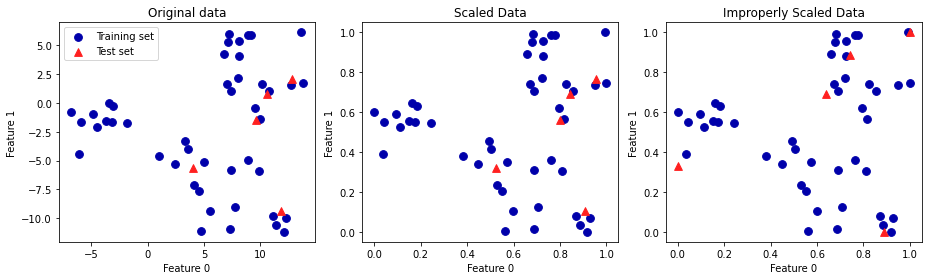

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import mglearn
# make synthetic data
X,_=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)

# split into training and test sets
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)

# plot the training and test sets
fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label='Training set',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2(1),label='Test set',s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original data')

# Scale the data using MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Visualize the properly scaled data
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label='Training set',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2(1),label='Test set',s=60)
axes[1].set_title('Scaled Data')

# rescale the test set separately
# so test set min is 0 and test set max is 1
# Do not Do This! For illustration purposes only.
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly=test_scaler.transform(X_test)

# Visualzie wrongly scaled data
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label='training set',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',c=mglearn.cm2(1),label='test set',s=60)
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
fig.tight_layout()

* The first panel is an unscaled two-dimensional dataset
* The second panel is the same data, but scaled using the MinMaxScaler
    * We called *fit* on the training set, and the called *transform* on the training and test sets
    * We can see that the dataset in the second panel looks identical to the first
        * All features are between 0 and 1
        * We can also see that the minimum and maximum feature values for the test data are not 0 and 1
* The third panel shows what would happen if we scaled the training set and test set separately.
    * In this case, the minimum and maximum feature values for both the training set and the test set are 0 and 1.
    * But now the dataset looks different
        * The test points moved incongruously to the training set, as they were scaled differently
    
Imagine the test set is a single point.    
There is no way to scale a single point correctly, to fulfill the minimum and maximum requirements of the MinMaxScaler.     
But the size of the test set should not change our processing

## The Effect of Preprocessing on Supervised Learning

First, fitting the SVC on the original data again for comparison.

In [11]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
print('Test set accuracy:{:.2f}'.format(svm.score(X_test,y_test)))

Test set accuracy:0.94


In [12]:
# preprocessing using 0-1 scaling
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#learning an SVM on the scaled training data
svm.fit(X_train_scaled,y_train)

#scoring on the scaled test set
print('Scaled test set accuracy:{:.2f}'.format(svm.score(X_test_scaled,y_test)))

Scaled test set accuracy:0.97


In [13]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# learning an SVM ont the scaled training data
svm.fit(X_train_scaled,y_train)

# scoring on the scaled test set
print('SVM test accuracy:{:.2f}'.format(svm.score(X_test_scaled,y_test)))

SVM test accuracy:0.96
